# Embeddings

In [14]:
import torch
import pandas as pd
import numpy as np
from transformers import AutoTokenizer, AutoModel
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [ ]:
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")
model = AutoModel.from_pretrained("bert-base-cased")


config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/436M [00:00<?, ?B/s]

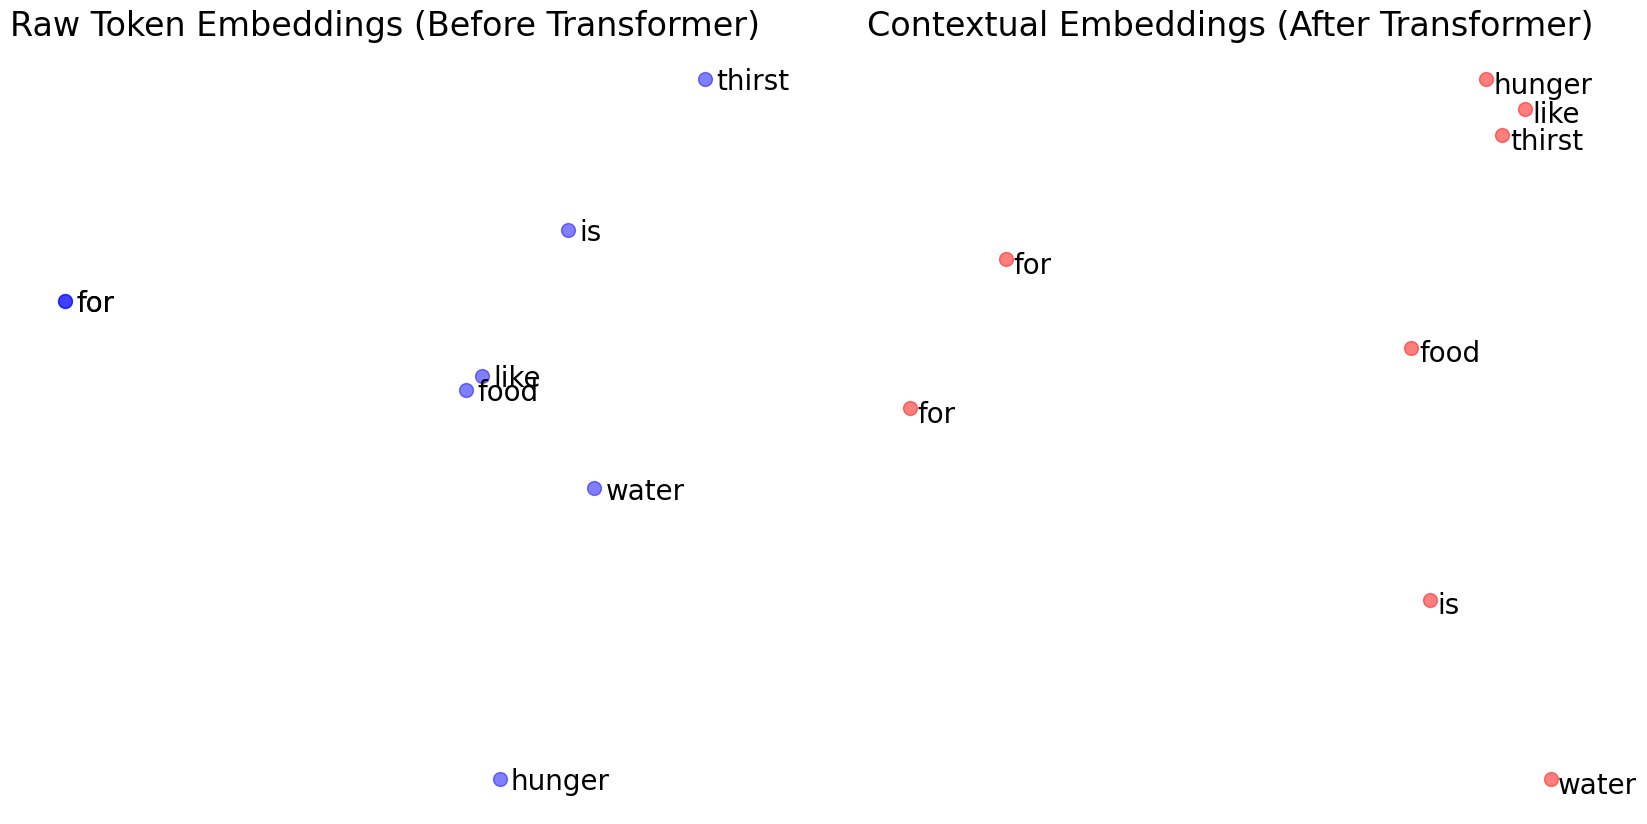

In [90]:
# Sentence
sentence = "Thirst for water is like hunger for food"
inputs = tokenizer(sentence, return_tensors="pt")
input_ids = inputs["input_ids"]

# 1. Contextual embeddings (after transformer layers)
outputs = model(**inputs)
last_hidden_states = outputs.last_hidden_state

# 2. Raw token embeddings (before any transformer layers)
with torch.no_grad():
    raw_embeddings = model.embeddings.word_embeddings(input_ids)

# 3. Convert token IDs to tokens
tokens = tokenizer.convert_ids_to_tokens(input_ids[0])

# Exclude [CLS] and [SEP]
valid_indices = [i for i, token in enumerate(tokens) if token not in ["[CLS]", "[SEP]"]]
filtered_tokens = [tokens[i] for i in valid_indices]

# Prepare embeddings
contextual_embeddings = last_hidden_states[0][valid_indices].detach().numpy()
raw_embeddings = raw_embeddings[0][valid_indices].detach().numpy()

# PCA Reduction
pca_contextual = PCA(n_components=2)
embeddings_2d_contextual = pca_contextual.fit_transform(contextual_embeddings)

pca_raw = PCA(n_components=2)
embeddings_2d_raw = pca_raw.fit_transform(raw_embeddings)

# Set up two subplots side-by-side
fig, axes = plt.subplots(1, 2, figsize=(20, 10))

# Set overall figure background to white
fig.patch.set_facecolor('white')

# Set axes backgrounds
axes[0].set_facecolor('white')     # Left plot stays white
axes[1].set_facecolor('#f0ecec')   # Right plot is light grey

# Plot Raw Embeddings on the left (axes[0])
axes[0].scatter(embeddings_2d_raw[:, 0], embeddings_2d_raw[:, 1], color='blue', alpha=0.5, s=100)
for i, token in enumerate(filtered_tokens):
    axes[0].annotate(token, (embeddings_2d_raw[i, 0]+0.01, embeddings_2d_raw[i, 1]+0.01),
                     color='black', fontsize=20, ha='left', va='top', textcoords='offset points',
                     xytext=(5, 5), rotation=0)
axes[0].set_title("Raw Token Embeddings (Before Transformer)", fontsize=24)
axes[0].axis('off')

# Plot Contextual Embeddings on the right (axes[1])
axes[1].scatter(embeddings_2d_contextual[:, 0], embeddings_2d_contextual[:, 1], color='red', alpha=0.5, s=100)
for i, token in enumerate(filtered_tokens):
    axes[1].annotate(token, (embeddings_2d_contextual[i, 0]+0.01, embeddings_2d_contextual[i, 1]+0.01),
                     color='black', fontsize=20, ha='left', va='top', textcoords='offset points',
                     xytext=(5, 5), rotation=0)
axes[1].set_title("Contextual Embeddings (After Transformer)", fontsize=24)
axes[1].axis('off')

# plt.tight_layout()
# Set figure background to white
fig.patch.set_facecolor('white')
plt.show()

In [ ]:
# Get the corresponding raw embedding
thirst_embedding_raw = raw_embeddings[filtered_tokens.index("thirst")]
print(f"Raw embedding for 'thirst':\n{thirst_embedding_raw}")


Raw embedding for 'thirst':
[ 6.62167044e-03 -5.83990803e-03 -2.09029447e-02  3.44377495e-02
  3.12547870e-02  1.77620873e-02  7.68049806e-02  5.41225029e-03
 -2.94229239e-02 -5.44285849e-02 -8.06664675e-02  1.54226115e-02
  2.59585865e-03 -5.91398478e-02  4.83517684e-02  6.97592497e-02
 -4.90345759e-03  4.29290719e-02  2.21617632e-02  4.17307876e-02
 -6.16762079e-02  3.48658785e-02 -7.00764582e-02 -3.80573049e-02
 -1.59123652e-02 -1.81142632e-02 -2.61841761e-03 -2.12248918e-02
  1.91561859e-02 -5.41289076e-02 -1.52583160e-02  5.16787544e-02
  4.52180812e-03  2.94362810e-02 -2.49805744e-03  6.30334578e-03
 -2.83290967e-02 -8.69099330e-03 -4.09030505e-02 -8.11702907e-02
 -2.18007527e-02 -1.45932391e-01 -3.02878022e-02 -8.70912801e-03
 -7.71998754e-03 -1.51622901e-02  8.01094845e-02 -4.33623195e-02
 -3.48794870e-02  8.09820089e-03  7.96294808e-02 -1.98294432e-03
  5.14942440e-05  3.53335254e-02  9.86938179e-03  3.57674509e-02
  3.34004164e-02 -5.63800558e-02  1.74834635e-02 -5.08533940e-